<a href="https://colab.research.google.com/github/Hlumelo-Ncedana/Spotify-Data-Analysis/blob/main/Spotify_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas matplotlib seaborn jupyter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from GitHub
url = "https://raw.githubusercontent.com/Hlumelo-Ncedana/Spotify-Data-Analysis/refs/heads/main/spotify_history.csv"  #GitHub raw file URL
data = pd.read_csv(url)

# Preview the data
data.head()


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
data.isnull().sum()


,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,143
reason_end,117
shuffle,0


In [5]:
data = data.dropna()  # Or use data.fillna() to fill missing values


In [7]:
# Convert the 'ts' column to datetime
data['ts'] = pd.to_datetime(data['ts'], errors='coerce')

# Check if it works
data.head()


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [8]:
data['shuffle'] = data['shuffle'].astype(bool)
data['skipped'] = data['skipped'].astype(bool)


In [9]:
track_duration = data.groupby('track_name')['ms_played'].sum().sort_values(ascending=False)
track_duration.head()


,ms_played
track_name,
Ode To The Mets,67431580
"The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)",64401661
"The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)",44756730
19 Dias y 500 Noches - En Directo,42914042
In the Blood,38427087


In [10]:
top_artists = data.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False)
top_albums = data.groupby('album_name')['ms_played'].sum().sort_values(ascending=False)


In [11]:
platform_usage = data.groupby('platform')['ms_played'].sum().sort_values(ascending=False)


In [12]:
skipped_tracks = data[data['skipped'] == True].groupby('track_name').size()
skipped_tracks.head()


,0
track_name,
"""Hit the Quan"" #HTQ",2
#SELFIE,1
'O sole mio (Arr. Chiaramello),5
"'Round Midnight (feat. John Coltrane, Red Garland, Paul Chambers & Philly Joe Jones)",2
(I Can't Get No) Satisfaction - Live At University Of Leeds / 1971,1


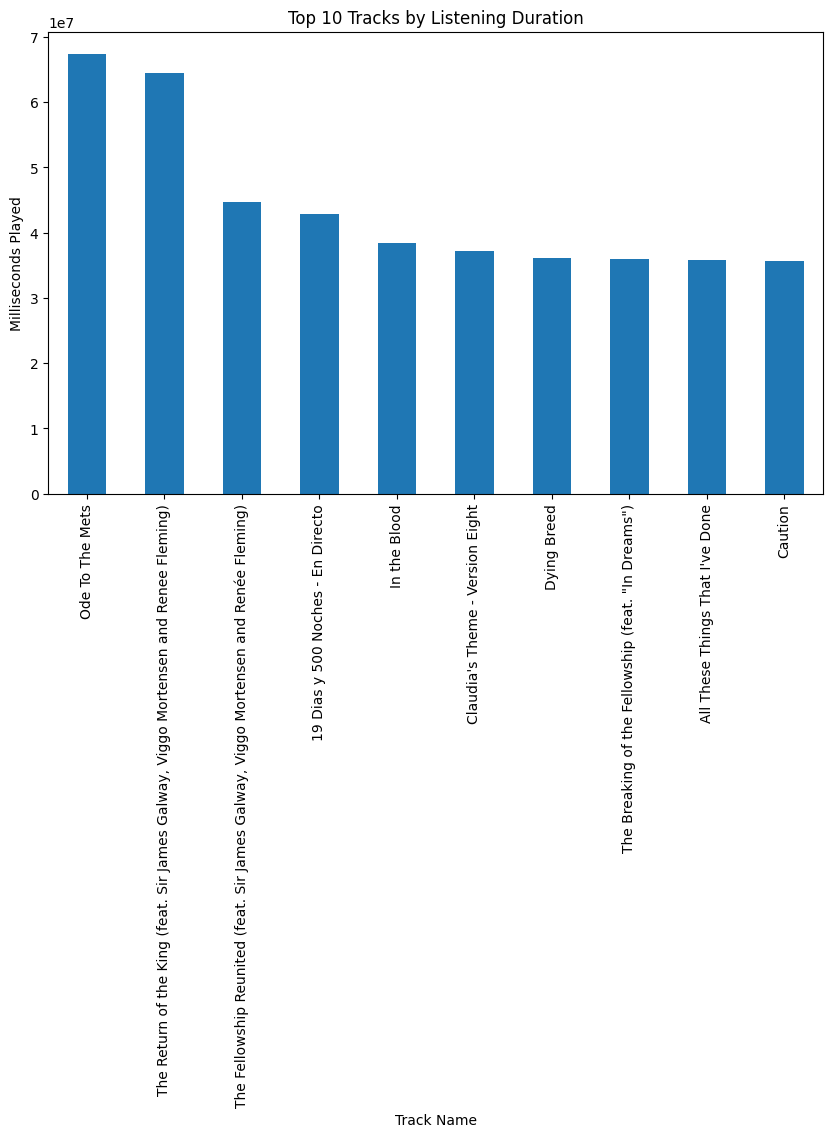

In [13]:
track_duration.head(10).plot(kind='bar', figsize=(10,6), title="Top 10 Tracks by Listening Duration")
plt.xlabel('Track Name')
plt.ylabel('Milliseconds Played')
plt.show()


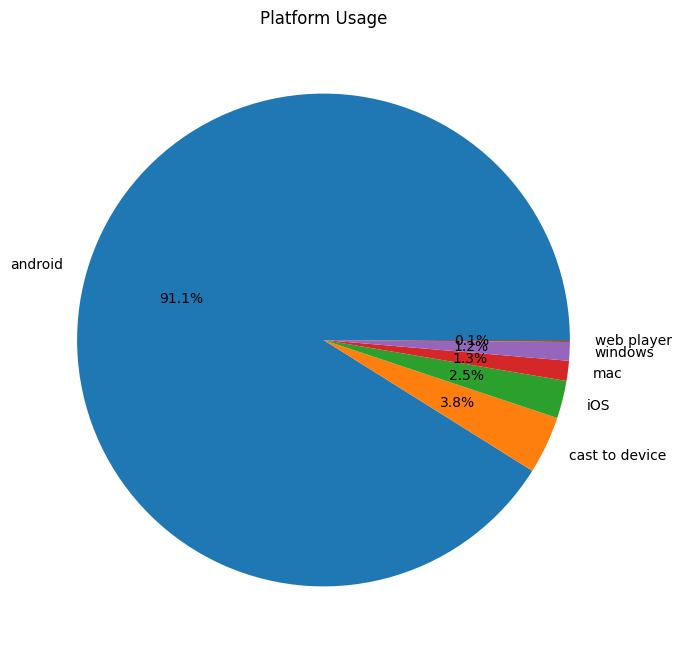

In [14]:
platform_usage.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title="Platform Usage")
plt.ylabel('')
plt.show()


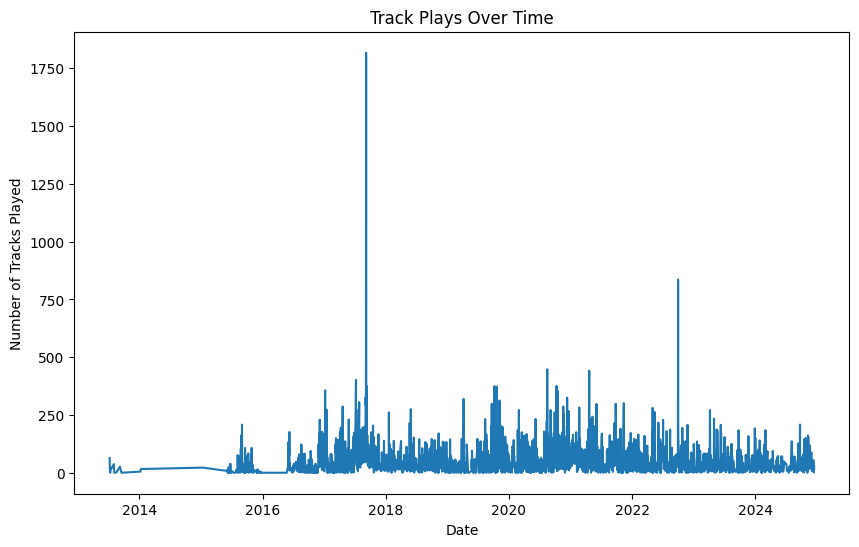

In [15]:
data['date'] = data['ts'].dt.date
daily_tracks = data.groupby('date')['track_name'].count()

daily_tracks.plot(figsize=(10,6), title="Track Plays Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Tracks Played')
plt.show()


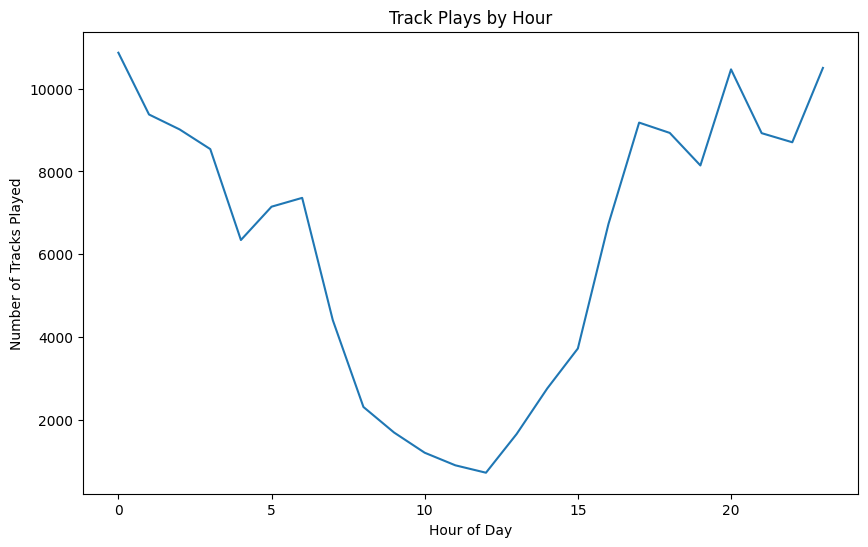

In [16]:
data['hour'] = data['ts'].dt.hour
hourly_tracks = data.groupby('hour')['track_name'].count()

hourly_tracks.plot(figsize=(10,6), title="Track Plays by Hour")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tracks Played')
plt.show()


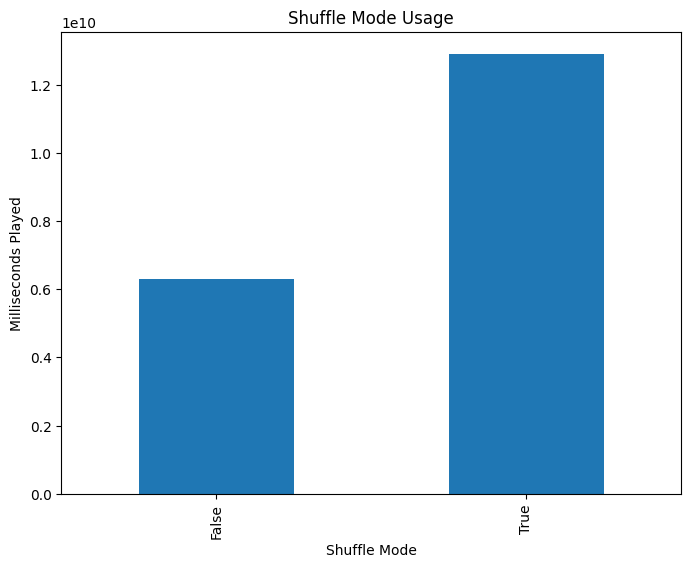

In [17]:
shuffle_usage = data.groupby('shuffle')['ms_played'].sum()
shuffle_usage.plot(kind='bar', figsize=(8,6), title="Shuffle Mode Usage")
plt.xlabel('Shuffle Mode')
plt.ylabel('Milliseconds Played')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20778 (\N{CJK UNIFIED IDEOGRAPH-512A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

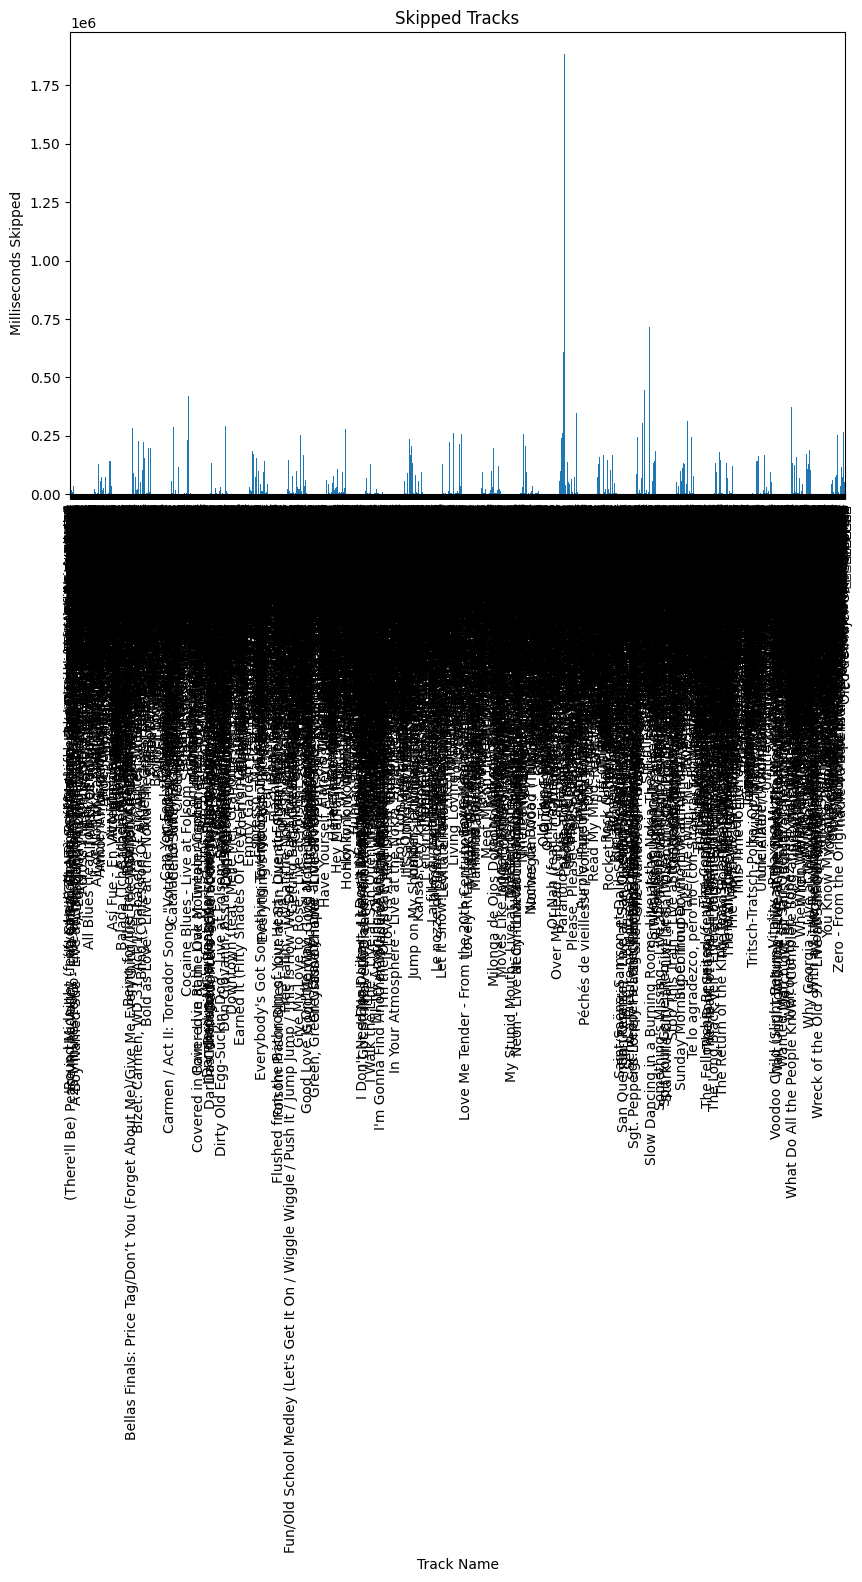

In [18]:
skipped_tracks = data[data['skipped'] == True].groupby('track_name')['ms_played'].sum()
skipped_tracks.plot(kind='bar', figsize=(10,6), title="Skipped Tracks")
plt.xlabel('Track Name')
plt.ylabel('Milliseconds Skipped')
plt.show()


In [19]:
data.to_csv('cleaned_spotify_data.csv', index=False)
